<a href="https://colab.research.google.com/github/Skillstomorrow83/Data_Loves_Python/blob/main/%D0%94%D0%97_HW2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/DataLoves/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [ ]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,weekday,weekday_num,week,year,day
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,Saturday,5,52,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,5,52,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,Saturday,5,52,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,Saturday,5,52,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,Saturday,5,52,2011,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  month        10886 non-null  int32  
 12  hour         10886 non-null  int32  
 13  weekday      10886 non-null  object 
 14  weekday_num  10886 non-null  int32  
 15  week         10886 non-null  UInt32 
 16  year         10886 non-null  int32  
 17  day          10886 non-null  int32  
dtypes: UInt32(1

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [ ]:
#  Групуємо з resample
count_rental_month = df['count'].resample('ME').sum()
count_rental_month

,count
datetime,
2011-01-31,23552
2011-02-28,32844
2011-03-31,38735
2011-04-30,50517
2011-05-31,79713
2011-06-30,89776
2011-07-31,92848
2011-08-31,83296
2011-09-30,79104


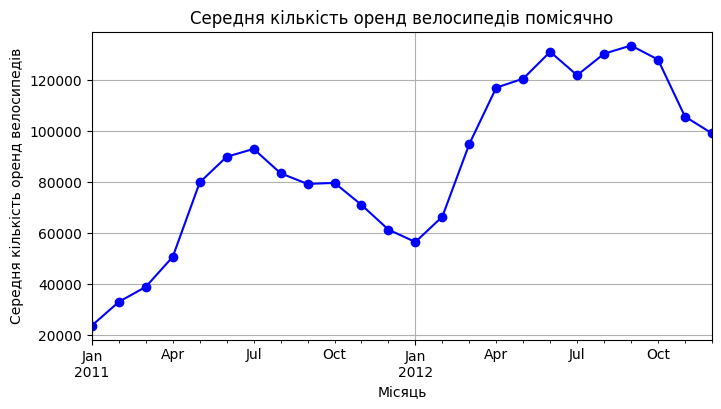

In [ ]:
# Побудова лінійного графіка з Pandas
count_rental_month.plot.line(
    figsize=(8, 4),
    marker='o',
    color='blue',
    title='Середня кількість оренд велосипедів помісячно',
    xlabel='Місяць',
    ylabel='Середня кількість оренд велосипедів',
    grid=True
);

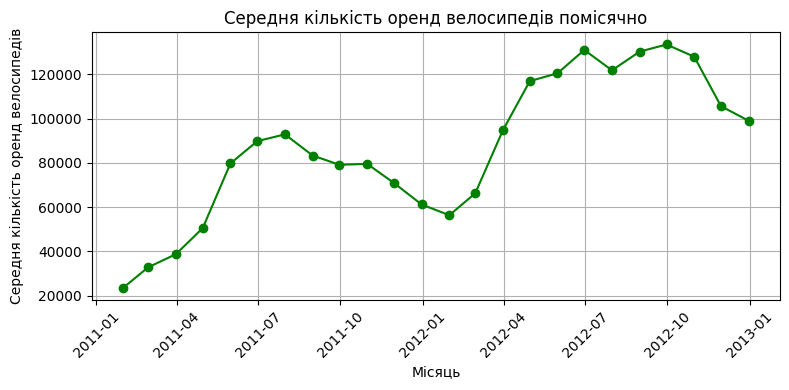

''

In [ ]:
# Побудова лінійного графіка з Matplotlib
plt.figure(figsize=(8, 4))
plt.plot(count_rental_month.index, count_rental_month.values, marker='o', color='green')
plt.title('Середня кількість оренд велосипедів помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд велосипедів')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
;

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [ ]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

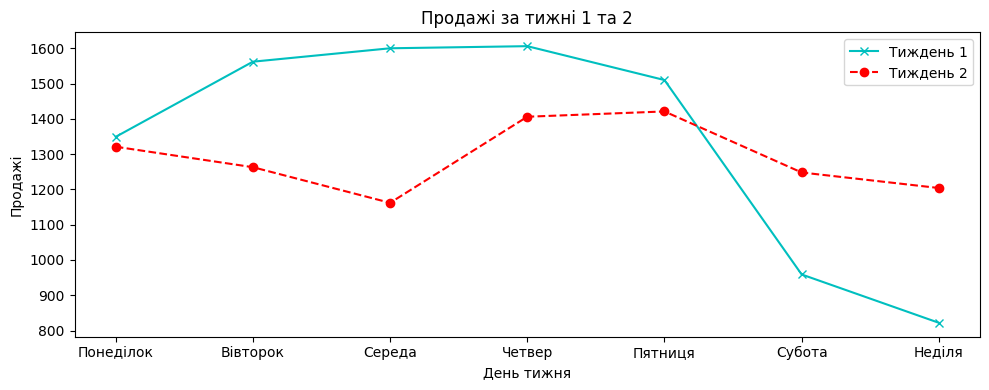

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(days, sales_week1, '-cx')
plt.plot(days, sales_week2, '--ro')
plt.title('Продажі за тижні 1 та 2')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.legend(['Тиждень 1', 'Тиждень 2'])
str_days = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'Пятниця', 'Субота', 'Неділя']
plt.xticks(days, str_days)
plt.tight_layout()
plt.show()

Судячи з графіку продажі були стабільніші в 2й тиждень.


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

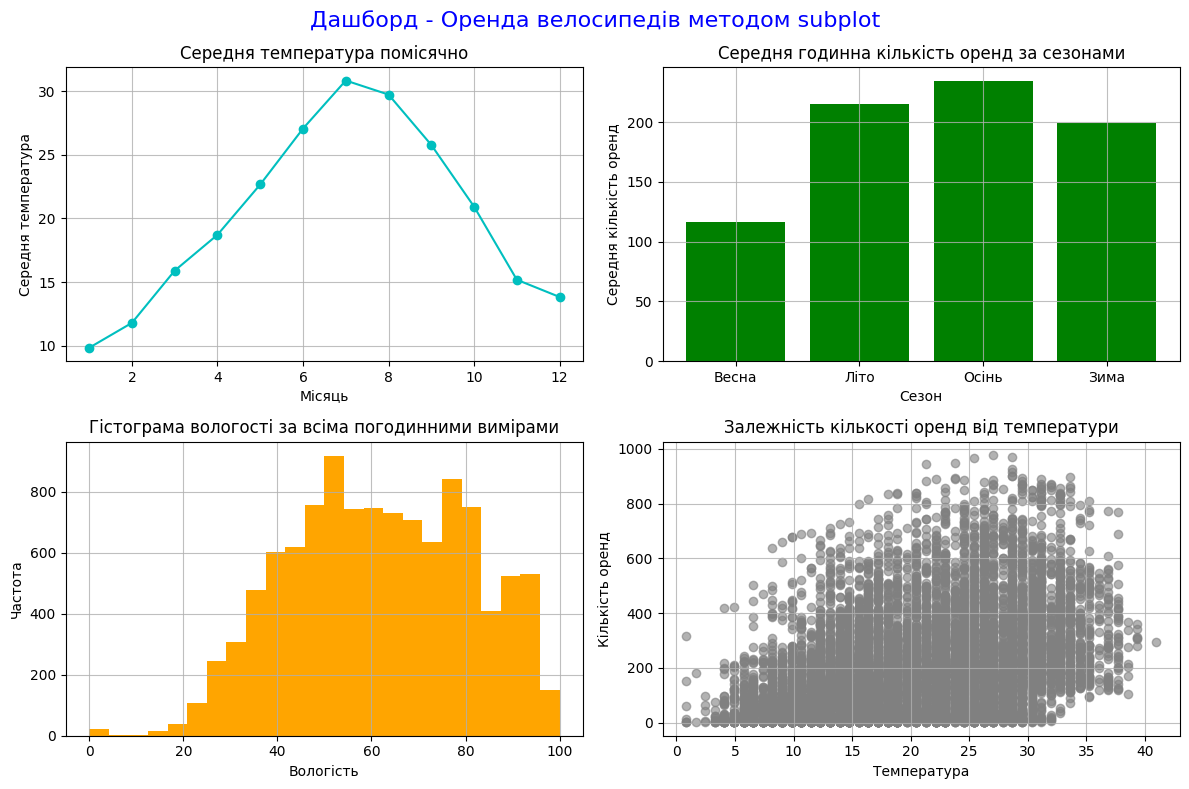

In [ ]:
plt.figure(figsize=(12, 8))

# Графік 1 - Лінійний графік середньої температури помісячно.
xy1=df.groupby('month')['temp'].mean()
plt.subplot(2, 2, 1)
plt.plot(xy1.index, xy1.values, '-co')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня температура')
plt.grid(True, alpha=0.8)
plt.tight_layout()

# Графік 2 - Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
xy2=df.groupby('season')['count'].mean()
plt.subplot(2, 2, 2)
plt.bar(xy2.index, xy2.values, color='green')
plt.title('Середня годинна кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.xticks([1, 2, 3, 4], ['Весна', 'Літо', 'Осінь', 'Зима'])
plt.grid(True, alpha=0.8)
plt.tight_layout()

# Графік 3 - Гістограма вологості за всіма погодинними вимірами.
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=24, color='orange')
plt.title('Гістограма вологості за всіма погодинними вимірами')
plt.xlabel('Вологість')
plt.ylabel('Частота')
plt.grid(True, alpha=0.8)
plt.tight_layout()

# Графік 4 - Scatter plot температури vs кількості оренд.
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], color='grey', alpha=0.6)
plt.title('Залежність кількості оренд від температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True, alpha=0.8)
plt.tight_layout()

plt.suptitle('Дашборд - Оренда велосипедів методом subplot', fontsize=16, color='blue')
plt.tight_layout()
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

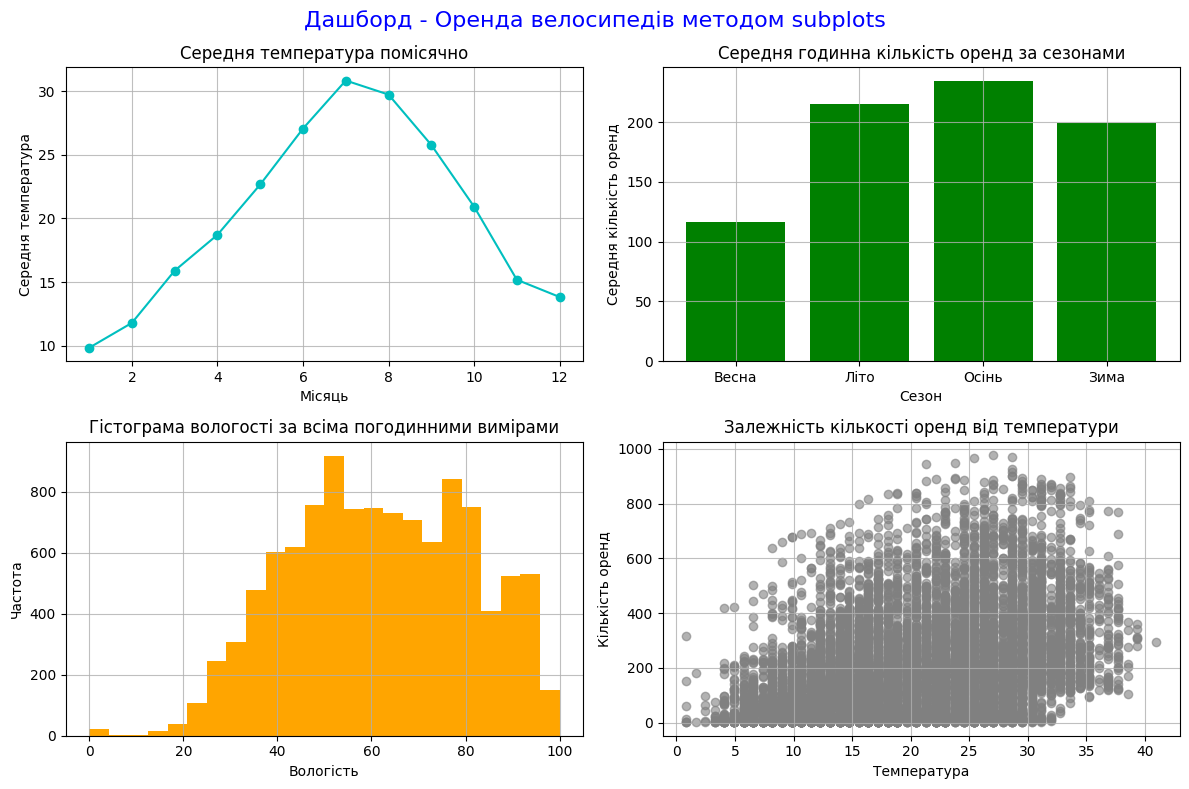

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Графік 1 - Лінійний графік середньої температури помісячно.
xy1=df.groupby('month')['temp'].mean()
ax[0,0].plot(xy1.index, xy1.values, '-co')
ax[0,0].set_title('Середня температура помісячно')
ax[0,0].set_xlabel('Місяць')
ax[0,0].set_ylabel('Середня температура')
ax[0,0].grid(True, alpha=0.8)
plt.tight_layout()

# Графік 2 - Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
xy2=df.groupby('season')['count'].mean()
ax[0,1].bar(xy2.index, xy2.values, color='green')
ax[0,1].set_title('Середня годинна кількість оренд за сезонами')
ax[0,1].set_xlabel('Сезон')
ax[0,1].set_ylabel('Середня кількість оренд')
ax[0,1].grid(True, alpha=0.8)
ax[0,1].set_xticks([1, 2, 3, 4], ['Весна', 'Літо', 'Осінь', 'Зима'])
plt.tight_layout()

# Графік 3 - Гістограма вологості за всіма погодинними вимірами.
ax[1,0].hist(df['humidity'], bins=24, color='orange')
ax[1,0].set_title('Гістограма вологості за всіма погодинними вимірами')
ax[1,0].set_xlabel('Вологість')
ax[1,0].set_ylabel('Частота')
ax[1,0].grid(True, alpha=0.8)
plt.tight_layout()

# Графік 4 - Scatter plot температури vs кількості оренд.
plt.scatter(df['temp'], df['count'], color='grey', alpha=0.6)
ax[1,1].set_title('Залежність кількості оренд від температури')
ax[1,1].set_xlabel('Температура')
ax[1,1].set_ylabel('Кількість оренд')
ax[1,1].grid(True, alpha=0.8)
plt.tight_layout()

plt.suptitle('Дашборд - Оренда велосипедів методом subplots', fontsize=16, color='blue')
plt.tight_layout()
plt.show()



Підхід побудови кількох графіків на одній фігурі з plt.subplots() відрізняється від plt.subplot() тим, що в ООП-методі можна легко звертатися до кожного з графіків для тонких налаштувань і трохи відрізняються назви деяких методів.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

Не потягну це завдання(( Мені на нього знадобиться тиждень витратити.